# Visualization with PYSCF
In this notebook, you will learn how to visualize orbitals using pyscf and [IQMOL](http://iqmol.org/index.html) (freely available).

In [1]:
# import packages
import pyscf

In [2]:
# create molecule and run RHF calculation
mol = pyscf.gto.Mole()
mol.build(
    atom = """H 0 0 0; H 0 0 0.7122""", # default distance unit is angstrom
    basis = "sto-3g",
    symmetry="Coov"
)
mf = pyscf.scf.RHF(mol) # init HF object
mf.kernel() # run SCF

converged SCF energy = -1.11750588420433


-1.117505884204331

In [3]:
# select an orbital and generate a cube file for it
# pyscf stores the MOs as columns in the mo_coeff property of the mf object
from pyscf.tools import cubegen
a = cubegen.orbital(mol, f"cube_files/MO_H2_1.cube", mf.mo_coeff[:, 0])
a = cubegen.orbital(mol, f"cube_files/MO_H2_2.cube", mf.mo_coeff[:, 1])

The resulting cube file can be visualized using the IQMOL package (and many more, it is a common file extension). Follow these steps:
1. open IQMOL
2. got to File > Open and navigate to the .cube file
3. on the left side of the screen you should see a drop down menu appear with the same name as your .cube file. click on it and find the button Cube Data
4. double click on Cube Data. This will open a GUI window where you can specify the details of your MO surface. Click calculate to visualize the selected orbital.

It is also compatible with Chemcraft.
1. open Chemcraft
2. go to File > Open and navigate to the .cube file
3. on the left side of the screen will appear a menu with options to visualize the orbitals
4. for isosurface representation, click on "Show isosurface" and "Both-signed" (to see both positive and negative phases of orbital)

### Modifying the extent of the orbitals
You might notice that for low iso values, there appear to be 'holes' in the iso surface.
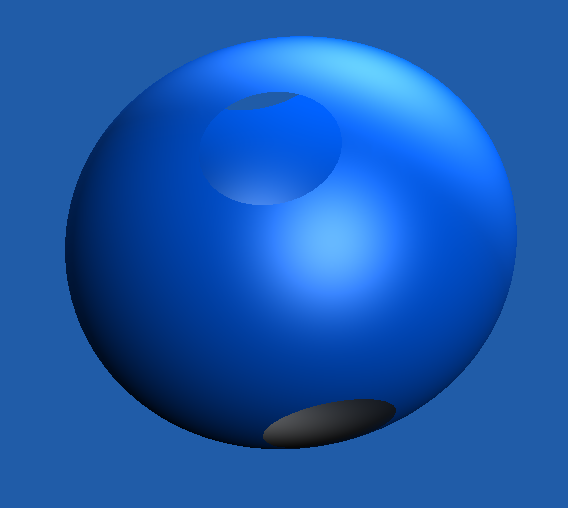

This is an artifact of the cube file generation being limited to a pre-defined subspace ("box").\
We can solve this by modifying the `EXTENT` parameter of the cubegen module: 

In [4]:
from pyscf import __config__
# Set the desired extent (in Bohr) globally
__config__.cubegen_box_margin = 5.0  

# reload the cubegen module
from importlib import reload
reload(cubegen)

a = cubegen.orbital(mol, f"cube_files/MO_H2_1_large.cube", mf.mo_coeff[:, 0])
a = cubegen.orbital(mol, f"cube_files/MO_H2_2_large.cube", mf.mo_coeff[:, 1])

Visualising these new `large` cube files now gives a clean isosurface.
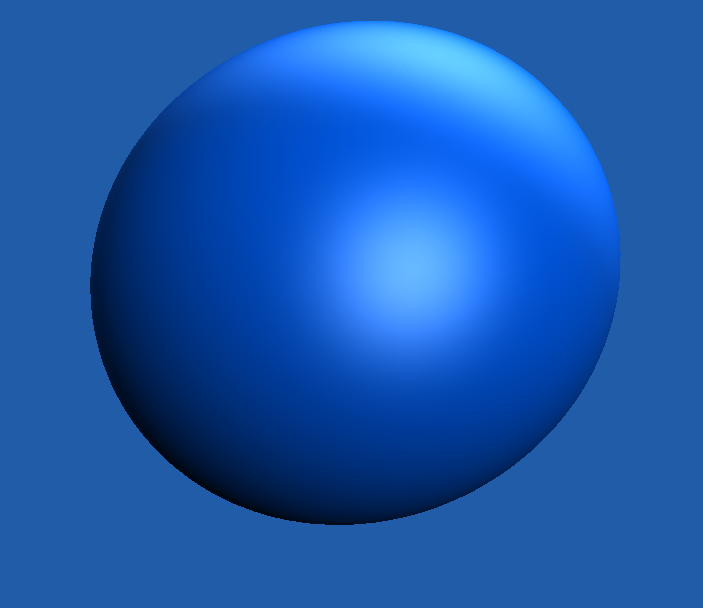

### TIPS
- It is possible to visualize other orbitals (for example natural orbitals) using this same method. However, keep in mind that all orbitals must be given in the AO basis that pyscf is using (with the same ordering of the basis functions).